<a href="https://colab.research.google.com/github/KrishnaSolo/HackeRankQwthSolution/blob/master/MNIST_Classfier_withConv_Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 10816)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               5538304   
_________________________________________________________________
dense_25 (Dense)             (None, 10)                5130      
Total params: 5,544,074
Trainable params: 5,544,074
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
60000/60000 [==============================] - 13s 211us/sample - loss: 0.1211 - acc: 0.9630
Epoch 2/10
60000/60000 [====

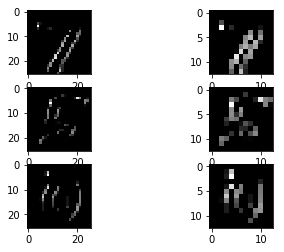

In [13]:
import tensorflow as tf
import matplotlib.pyplot as plt

#callback to tell it to end training
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('acc')>0.998):
      print("\nMet 99.8% accuracy.")
      self.model.stop_training = True

callbacks = myCallback()

#load mnist handwriting data
mnist = tf.keras.datasets.mnist

#set up images 
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images.reshape(60000, 28, 28, 1)
training_images=training_images / 255.0
test_images = test_images.reshape(10000, 28, 28, 1)
test_images=test_images/255.0

#train using conv and pool
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()
#train and test model
model.fit(training_images, training_labels, epochs=10) #callbacks=[callbacks])
test_loss, test_acc = model.evaluate(test_images, test_labels)

print(test_acc)

#visualize how the image changed over the layers
f, axarr = plt.subplots(3,2)
#3 different sneaker samples
FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 60
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,2):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='gray')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='gray')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='gray')
  axarr[2,x].grid(False)